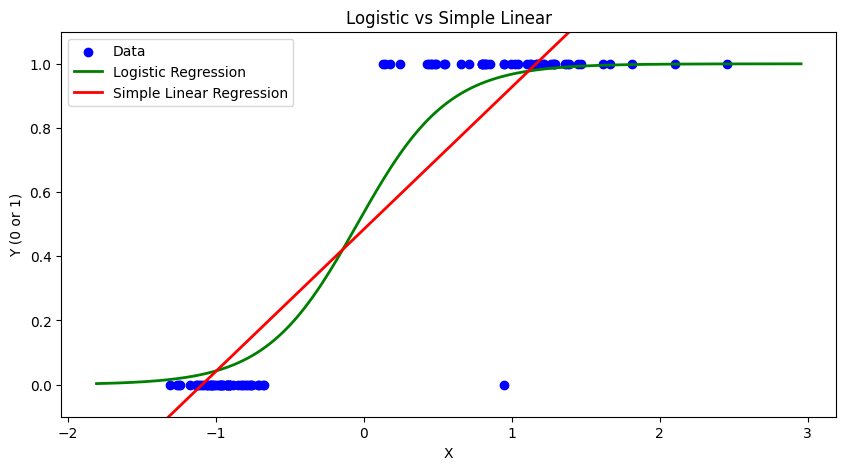

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression

# 인위적으로 생성한 데이터
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 로지스틱 회귀 모델 훈련
logreg = LogisticRegression()
logreg.fit(X, y)

# 단순 선형 회귀 모델 훈련
linreg = LinearRegression()
linreg.fit(X, y)

# 예측을 위한 X 값 생성
x_range= np.linspace(X.min() - 0.5, X.max() + 0.5, 300)
y_pred_logreg = logreg.predict_proba(x_range.reshape(-1, 1))[:, 1]
y_pred_linreg = linreg.predict(x_range.reshape(-1, 1))

# 시각화
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(x_range, y_pred_logreg, label='Logistic Regression', color='green', linewidth=2)
plt.plot(x_range, y_pred_linreg, label='Simple Linear Regression', color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y (0 or 1)')
plt.legend()
plt.title('Logistic vs Simple Linear')
plt.ylim(-.1, 1.1) # Y 축 범위 설정
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print("\n Sample Data (Top 5 rows):")
print(df.head())


 Sample Data (Top 5 rows):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  

In [4]:
# 특성 1개만 선택
X = df[['worst area']].values  # 2D array # worst area: 가장 큰 세포 핵의 넓이
y = df['target'].values

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [13]:
# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 확률 예측 (시그모이드 곡선)
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
probs = model.predict_proba(x_range)[:, 1]

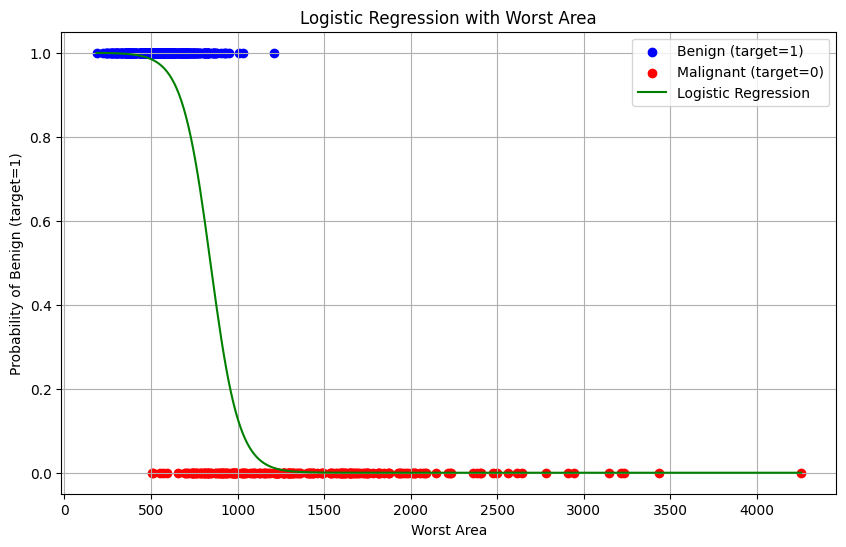

In [16]:
# 시각화
plt.figure(figsize=(10, 6))

# benign: 양성, malignant: 악성
plt.scatter(X[y == 1], np.full_like(X[y == 1], 1), color='blue', label='Benign (target=1)')
plt.scatter(X[y == 0], np.full_like(X[y == 0], 0), color='red', label='Malignant (target=0)')
plt.plot(x_range, probs, color='green', label='Logistic Regression')
plt.xlabel('Worst Area')
plt.ylabel('Probability of Benign (target=1)')
plt.title('Logistic Regression with Worst Area')
plt.legend()
plt.grid()
plt.show()

# TODO

In [17]:
# 특성 1개만 선택
A = df[['mean radius']].values  # 2D array # mean radius: 종양 세포 핵의 반지름
b = df['target'].values

# 훈련/테스트 분할
A_train, A_test, b_train, b_test = train_test_split(A, b, stratify=b, random_state=0)

In [18]:
# 모델 학습
model = LogisticRegression()
model.fit(A_train, b_train)

# 확률 예측 (시그모이드 곡선)
A_range = np.linspace(A.min(), A.max(), 300).reshape(-1, 1)
probs = model.predict_proba(A_range)[:, 1]

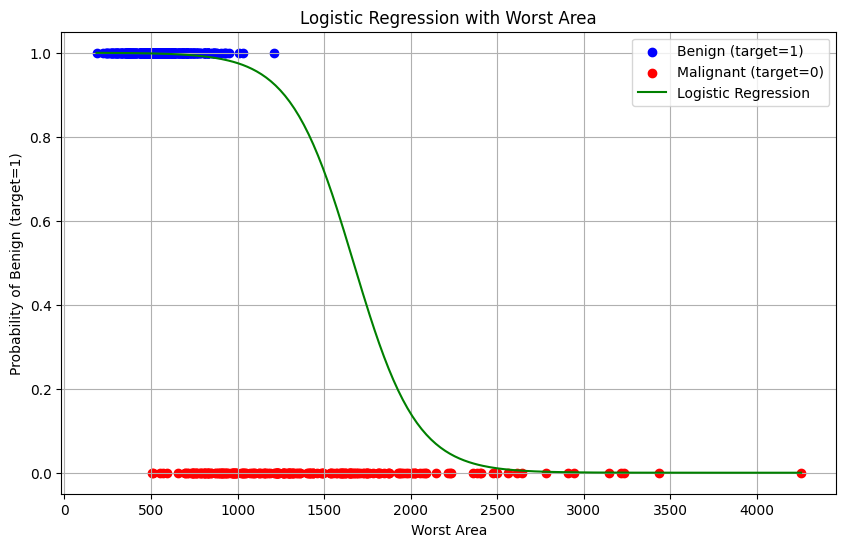

In [19]:
# 시각화
plt.figure(figsize=(10, 6))

# benign: 양성, malignant: 악성
plt.scatter(X[b == 1], np.full_like(A[b == 1], 1), color='blue', label='Benign (target=1)')
plt.scatter(X[b == 0], np.full_like(A[b == 0], 0), color='red', label='Malignant (target=0)')
plt.plot(x_range, probs, color='green', label='Logistic Regression')
plt.xlabel('Worst Area')
plt.ylabel('Probability of Benign (target=1)')
plt.title('Logistic Regression with Worst Area')
plt.legend()
plt.grid()
plt.show()